In [71]:
import pylib.BenchmarkingUtilAdj
from importlib import reload
reload(pylib.BenchmarkingUtilAdj)

from pylib.BenchmarkingUtilAdj import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = '../simulated_bulk_analysis/report_data'
sample_id = 'truncated_bulk_rnaseq'

## Preparing input data

## Prep Reference data

In [4]:
ref_gtf_file = data_dir + "/reference/benchmark_full_annotations.gtf"
ref_quant_file = data_dir + "/reference/benchmark_transcript_expression.tsv"

In [5]:
i_ref_df = indexDfByIntronId(parseGTFtoIntronIDsandQuants(ref_gtf_file, ref_quant_file))

i_ref_df

-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_full_annotations.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


,transcript_ids,gene_ids,tpm
intronId,,,
"10:100042573-100048757:-,10:100048876-100054346:-,10:100054446-100057012:-,10:100057152-100063613:-,10:100063725-100065187:-,10:100065370-100069713:-,10:100069869-100075910:-,10:100076107-100081402:-",ENST00000370418,ENSG00000120054,0.285346
"10:100152352-100154859:-,10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-",ENST00000421367,ENSG00000107566,72.049779
"10:100189627-100190868:-,10:100190968-100193297:-,10:100193431-100193983:-,10:100194131-100194424:-,10:100194521-100199970:-,10:100200020-100200670:-,10:100200780-100202087:-,10:100202149-100204505:-,10:100204657-100205075:-,10:100205199-100207229:-,10:100207332-100209594:-,10:100209789-100217994:-,10:100218130-100218717:-,10:100218825-100219007:-,10:100219132-100219269:-,10:100219359-100220587:-,10:100220676-100222111:-,10:100222181-100222865:-,10:100222980-100225922:-,10:100226017-100229427:-",ENST00000370397,ENSG00000213341,18.690141
"10:100233371-100235666:-,10:100235764-100236849:-,10:100236969-100238021:-,10:100238231-100243697:-,10:100243777-100245798:-,10:100245913-100246794:-,10:100246935-100250247:-,10:100250332-100253420:-,10:100253539-100256261:-,10:100256476-100260217:-,10:100260319-100260965:-,10:100261044-100261978:-,10:100262063-100267570:-",ENST00000354105,ENSG00000095485,25.966455
"10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100282905:-",ENST00000618916,ENSG00000196072,0.428018
...,...,...,...
"Y:12904414-12904934:+,Y:12904981-12907536:+,Y:12907594-12909359:+,Y:12909407-12911838:+,Y:12911968-12912726:+,Y:12912882-12912962:+,Y:12913062-12913717:+,Y:12913853-12914563:+,Y:12914649-12914883:+,Y:12914982-12915066:+,Y:12915227-12915629:+,Y:12915774-12915882:+,Y:12916027-12916260:+,Y:12916442-12916516:+,Y:12916634-12916906:+,Y:12917060-12917402:+,Y:12917542-12918042:+",ENST00000360160,ENSG00000067048,0.570691
"Y:20575887-20579607:+,Y:20579691-20582589:+,Y:20582693-20584473:+,Y:20584524-20588023:+,Y:20588105-20589483:+,Y:20589575-20592340:+",ENST00000361365,ENSG00000198692,0.285346
"Y:20575887-20579607:+,Y:20579691-20582589:+,Y:20582693-20588023:+,Y:20588105-20589483:+,Y:20589575-20592340:+",ENST00000382772,ENSG00000198692,0.285346


In [6]:
downsampled_10_gtf = data_dir + "/reference/benchmark_downsampled_10.gtf"
downsampled_20_gtf = data_dir + "/reference/benchmark_downsampled_20.gtf"
downsampled_30_gtf = data_dir + "/reference/benchmark_downsampled_30.gtf"

In [7]:
i_downsampled_10_gtf_df = indexDfByIntronId(parseGTFtoIntronIDs(downsampled_10_gtf))
i_downsampled_20_gtf_df = indexDfByIntronId(parseGTFtoIntronIDs(downsampled_20_gtf))
i_downsampled_30_gtf_df = indexDfByIntronId(parseGTFtoIntronIDs(downsampled_30_gtf))

-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


In [8]:
i_downsampled_10_gtf_df['down_10'] = True
i_downsampled_20_gtf_df['down_20'] = True
i_downsampled_30_gtf_df['down_30'] = True

i_ref_df = i_ref_df.join(i_downsampled_10_gtf_df['down_10'])
i_ref_df = i_ref_df.join(i_downsampled_20_gtf_df['down_20'])
i_ref_df = i_ref_df.join(i_downsampled_30_gtf_df['down_30'])

i_ref_df.fillna(False, inplace=True)

i_ref_df.head()

,transcript_ids,gene_ids,tpm,down_10,down_20,down_30
intronId,,,,,,
"10:100042573-100048757:-,10:100048876-100054346:-,10:100054446-100057012:-,10:100057152-100063613:-,10:100063725-100065187:-,10:100065370-100069713:-,10:100069869-100075910:-,10:100076107-100081402:-",ENST00000370418,ENSG00000120054,0.285346,True,True,True
"10:100152352-100154859:-,10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-",ENST00000421367,ENSG00000107566,72.049779,True,True,True
"10:100189627-100190868:-,10:100190968-100193297:-,10:100193431-100193983:-,10:100194131-100194424:-,10:100194521-100199970:-,10:100200020-100200670:-,10:100200780-100202087:-,10:100202149-100204505:-,10:100204657-100205075:-,10:100205199-100207229:-,10:100207332-100209594:-,10:100209789-100217994:-,10:100218130-100218717:-,10:100218825-100219007:-,10:100219132-100219269:-,10:100219359-100220587:-,10:100220676-100222111:-,10:100222181-100222865:-,10:100222980-100225922:-,10:100226017-100229427:-",ENST00000370397,ENSG00000213341,18.690141,True,True,True
"10:100233371-100235666:-,10:100235764-100236849:-,10:100236969-100238021:-,10:100238231-100243697:-,10:100243777-100245798:-,10:100245913-100246794:-,10:100246935-100250247:-,10:100250332-100253420:-,10:100253539-100256261:-,10:100256476-100260217:-,10:100260319-100260965:-,10:100261044-100261978:-,10:100262063-100267570:-",ENST00000354105,ENSG00000095485,25.966455,True,True,True
"10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100282905:-",ENST00000618916,ENSG00000196072,0.428018,True,True,True


In [9]:
i_ref_df.copy().reset_index().to_csv("refDf.intron_ids_and_expression.tsv", sep="\t", index=False)

## prep quant results for full ref annots from various methods

In [10]:
# quants based on the full ref annot

flair_trans_id_modifier_func = lambda x: x.split("_")[0]

fileList = getFiles('{0}/{1}_quant/'.format(data_dir, sample_id), 'sample')
fullQuantsDf_dict = {}
for file in fileList:
    gtf, tsv = file[0], file[1]
    #annotatedDfList.append(countsWithIntronIds(gtf, tsv))
    progname = gtf.split("/")[-1].split(".")[0]
    transcript_id_modifier_func = flair_trans_id_modifier_func if "flair" in progname else None
    print(progname, gtf, tsv)
    fullQuantsDf_dict[progname] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf, tsv, transcript_id_modifier_func))
    

LRAA ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


bambu ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


espresso ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


flair ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


isoquant ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


isosceles ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


liqa ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


nanocount ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


In [13]:
for progname, df in fullQuantsDf_dict.items():
    print("\n\n" + progname)
    print(df.head(1))
    



LRAA
                                                     transcript_ids  \
intronId                                                              
10:100042573-100048757:-,10:100048876-100054346...  ENST00000370418   

                                                           gene_ids    tpm  
intronId                                                                    
10:100042573-100048757:-,10:100048876-100054346...  ENSG00000120054  0.086  


bambu
                                                     transcript_ids  \
intronId                                                              
10:100042573-100048757:-,10:100048876-100054346...  ENST00000370418   

                                                           gene_ids       tpm  
intronId                                                                       
10:100042573-100048757:-,10:100048876-100054346...  ENSG00000120054  0.172897  


espresso
                                                     transcript_ids        

# Quant comparison for full ref annotations

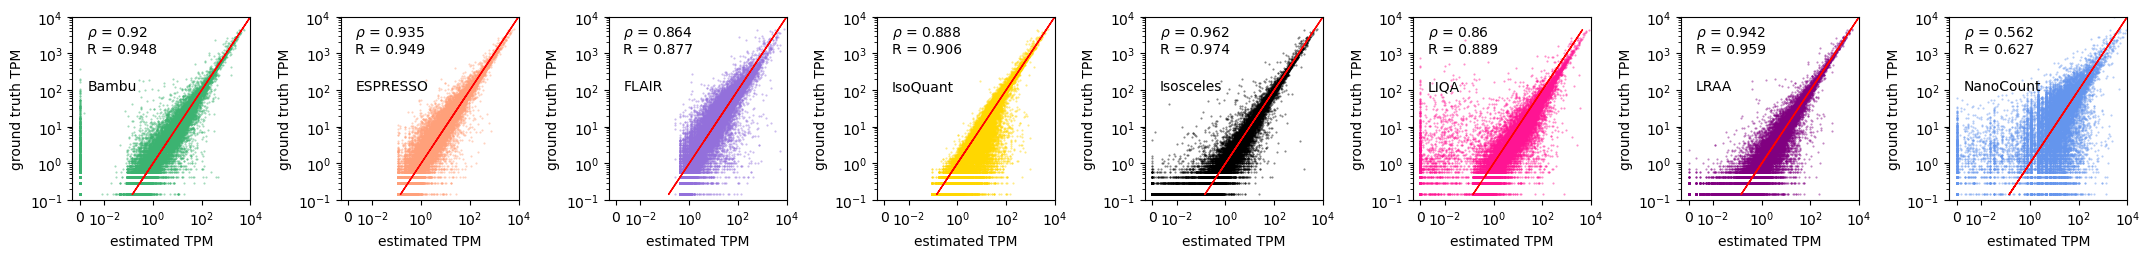

In [14]:
scatterplot_adj(i_ref_df, fullQuantsDf_dict)

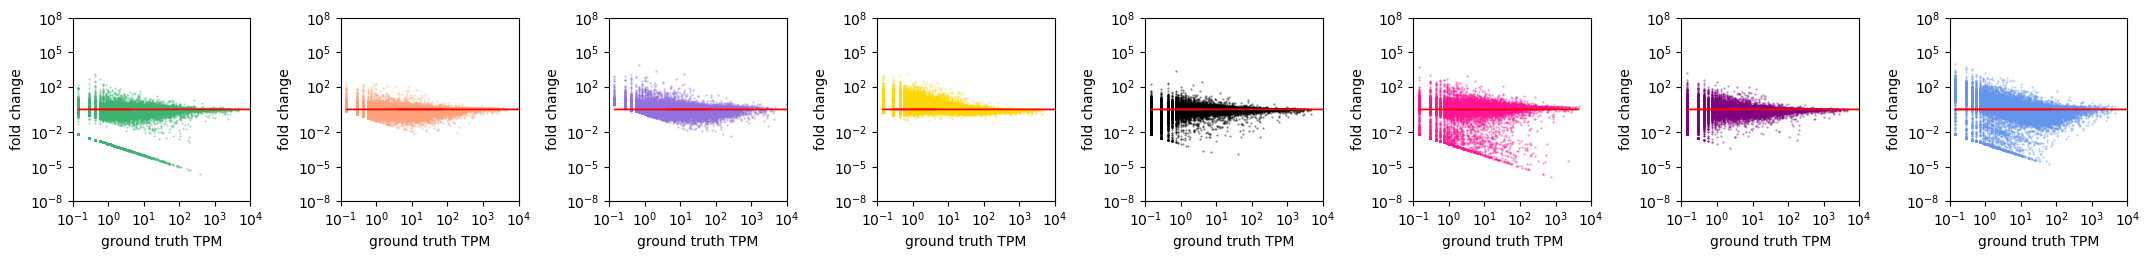

In [15]:
ma_plot_adj(i_ref_df, fullQuantsDf_dict)

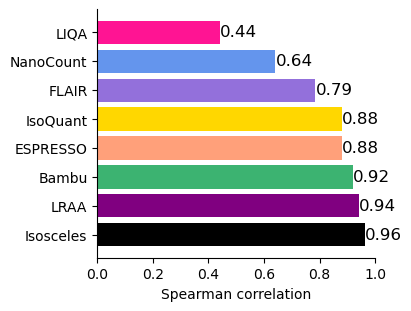

In [16]:
cor_spearman_barplot(i_ref_df, fullQuantsDf_dict)

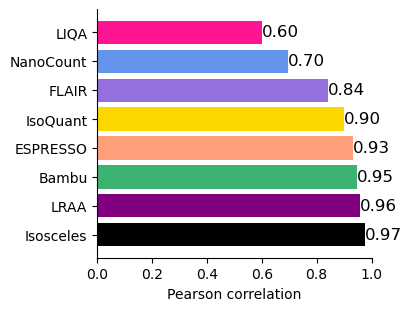

In [17]:
cor_pearson_barplot(i_ref_df, fullQuantsDf_dict)

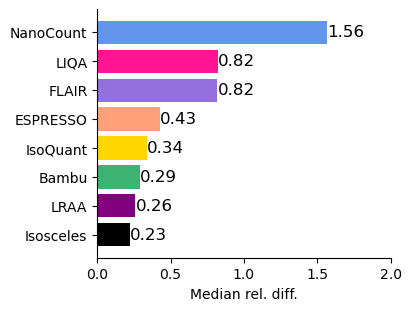

In [18]:
#rel_diff_barplot(refDf, annotatedDfList, 'mean')
rel_diff_barplot(i_ref_df, fullQuantsDf_dict, 'median')

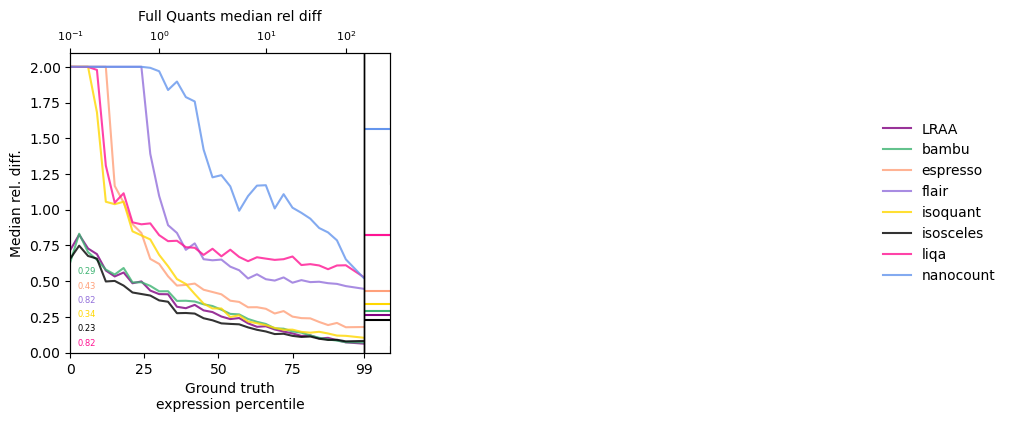

In [19]:
rel_diff_vs_expr_percentile_plot(i_ref_df, fullQuantsDf_dict, 33, 'median', 'Full Quants median rel diff')

# Examine Isoform ID and Quant with ref-reduced scenarios

## parse gtf and quants for ref-reduced scenarios:

In [20]:
prog_to_downsampled_df_dict = {}

flair_trans_id_modifier_func = lambda x: x.split("_")[0]

# has the downsampled gtfs as guides
fileList = getFiles('{0}/{1}_denovo/'.format(data_dir, sample_id), 'sample')
for file in fileList:
    gtf, tsv = file[0], file[1]
    progname_downsample = gtf.split("/")[-1].split(".")[0]
  
    print(progname_downsample, gtf, tsv)
    transcript_id_modifier_func = flair_trans_id_modifier_func if "flair" in progname_downsample else None
    #dfList.append(countsWithIntronIds(gtf, tsv))
    prog_to_downsampled_df_dict[progname_downsample] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf, tsv, transcript_id_modifier_func))
    
    

LRAA_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


LRAA_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


LRAA_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


bambu_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


bambu_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


bambu_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


espresso_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down10.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


espresso_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down20.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


espresso_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down30.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


flair_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


flair_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


flair_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


isoquant_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


isoquant_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


isoquant_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


isosceles_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


isosceles_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


isosceles_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


In [21]:
# incorporate liqa and nanocount

fileList = getFiles('{0}/{1}_stringtie/'.format(data_dir, sample_id), 'sample')
for file in fileList:
    gtf, tsv = file[0], file[1]
    if "liqa" in gtf or "nanocount" in gtf:   
        progname_downsample = gtf.split("/")[-1].split(".")[0]
        print(progname_downsample, gtf, tsv)
        prog_to_downsampled_df_dict[progname_downsample] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf, tsv))
    

liqa_stringtie_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


liqa_stringtie_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


liqa_stringtie_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


nanocount_stringtie_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


nanocount_stringtie_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


nanocount_stringtie_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


In [22]:
for prog_downsample, df in prog_to_downsampled_df_dict.items():
    print(prog_downsample)
    df.copy().reset_index().to_csv(prog_downsample + ".intron_ids_and_expr.tsv", sep="\t", index=False)

LRAA_down10
LRAA_down20
LRAA_down30
bambu_down10
bambu_down20
bambu_down30
espresso_down10
espresso_down20
espresso_down30
flair_down10
flair_down20
flair_down30
isoquant_down10
isoquant_down20
isoquant_down30
isosceles_down10
isosceles_down20
isosceles_down30
liqa_stringtie_down10
liqa_stringtie_down20
liqa_stringtie_down30
nanocount_stringtie_down10
nanocount_stringtie_down20
nanocount_stringtie_down30


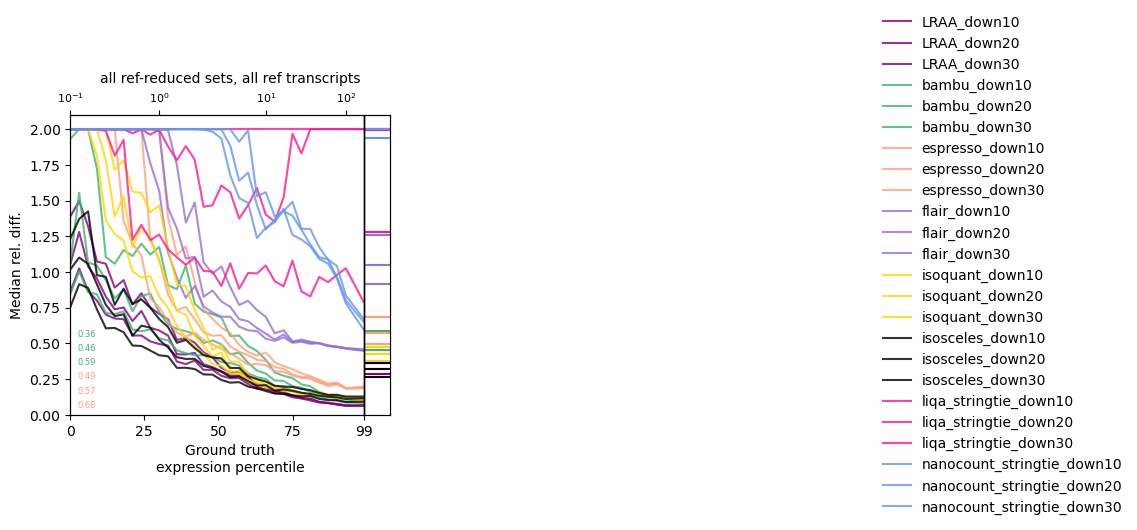

In [23]:
rel_diff_vs_expr_percentile_plot(i_ref_df, prog_to_downsampled_df_dict, 33, 'median',
                                 'all ref-reduced sets, all ref transcripts')

# Down 10 ref-reduced

In [24]:
down_10_dict = { sample_name : prog_to_downsampled_df_dict[sample_name] 
                for sample_name in prog_to_downsampled_df_dict 
                if "down10" in sample_name}

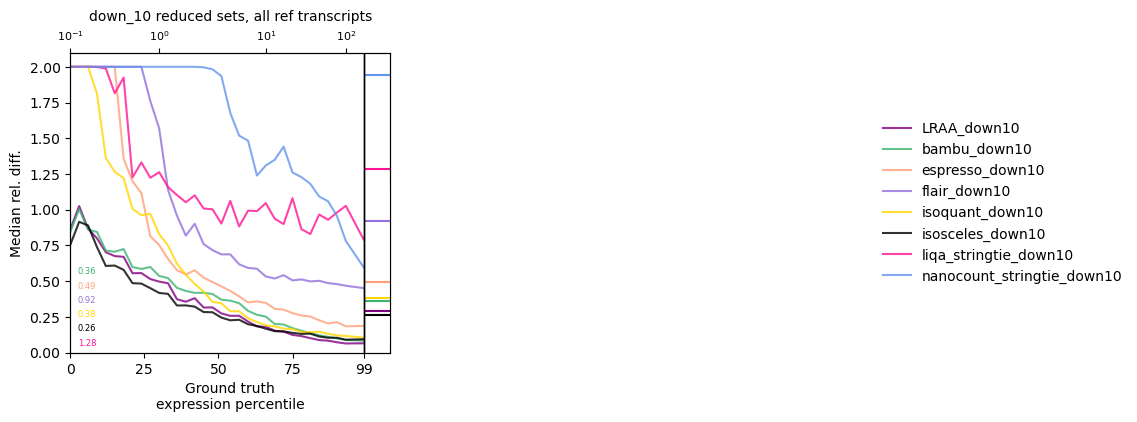

In [25]:
rel_diff_vs_expr_percentile_plot(i_ref_df, down_10_dict, 33, 'median', 'down_10 reduced sets, all ref transcripts')

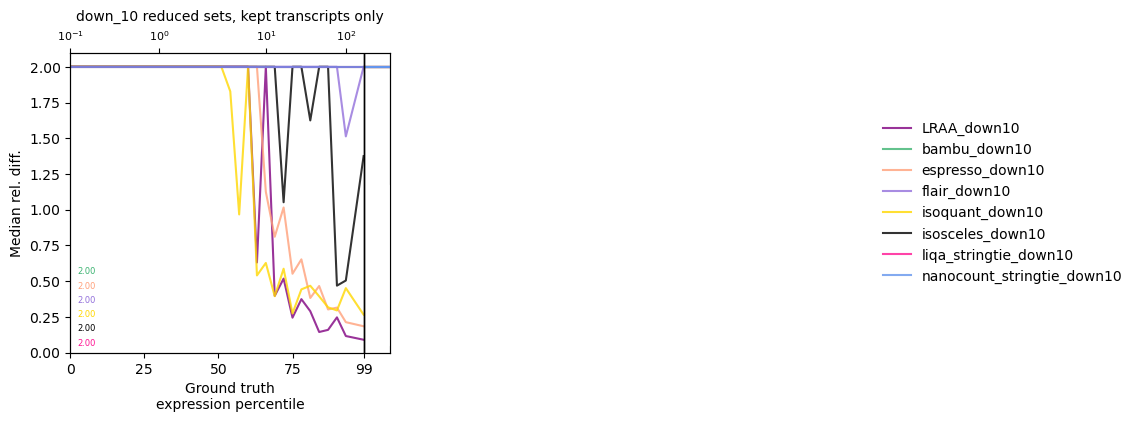

In [26]:
down_10_kept_intron_ids = i_ref_df[i_ref_df['down_10'] == False].index

rel_diff_vs_expr_percentile_plot(i_ref_df, down_10_dict, 33, 'median', 'down_10 reduced sets, kept transcripts only', 
                                intron_ids_use = down_10_kept_intron_ids)

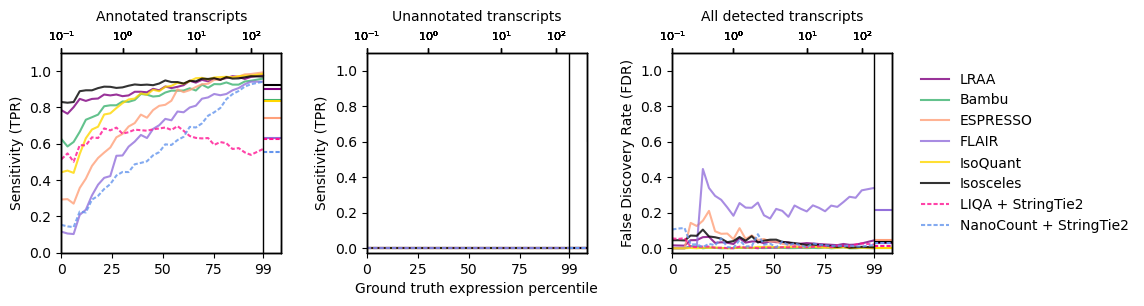

In [44]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_10_dict, 33, 'median', 'down-10 set')

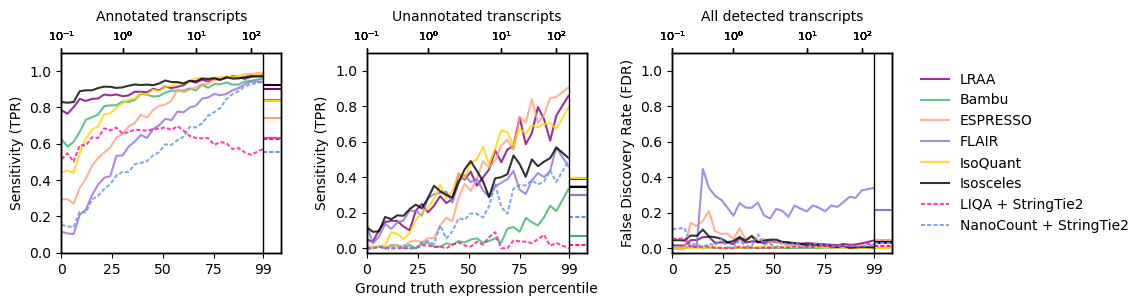

In [28]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_10_dict, 33, 'median', 'down-10 set', down_10_kept_intron_ids)

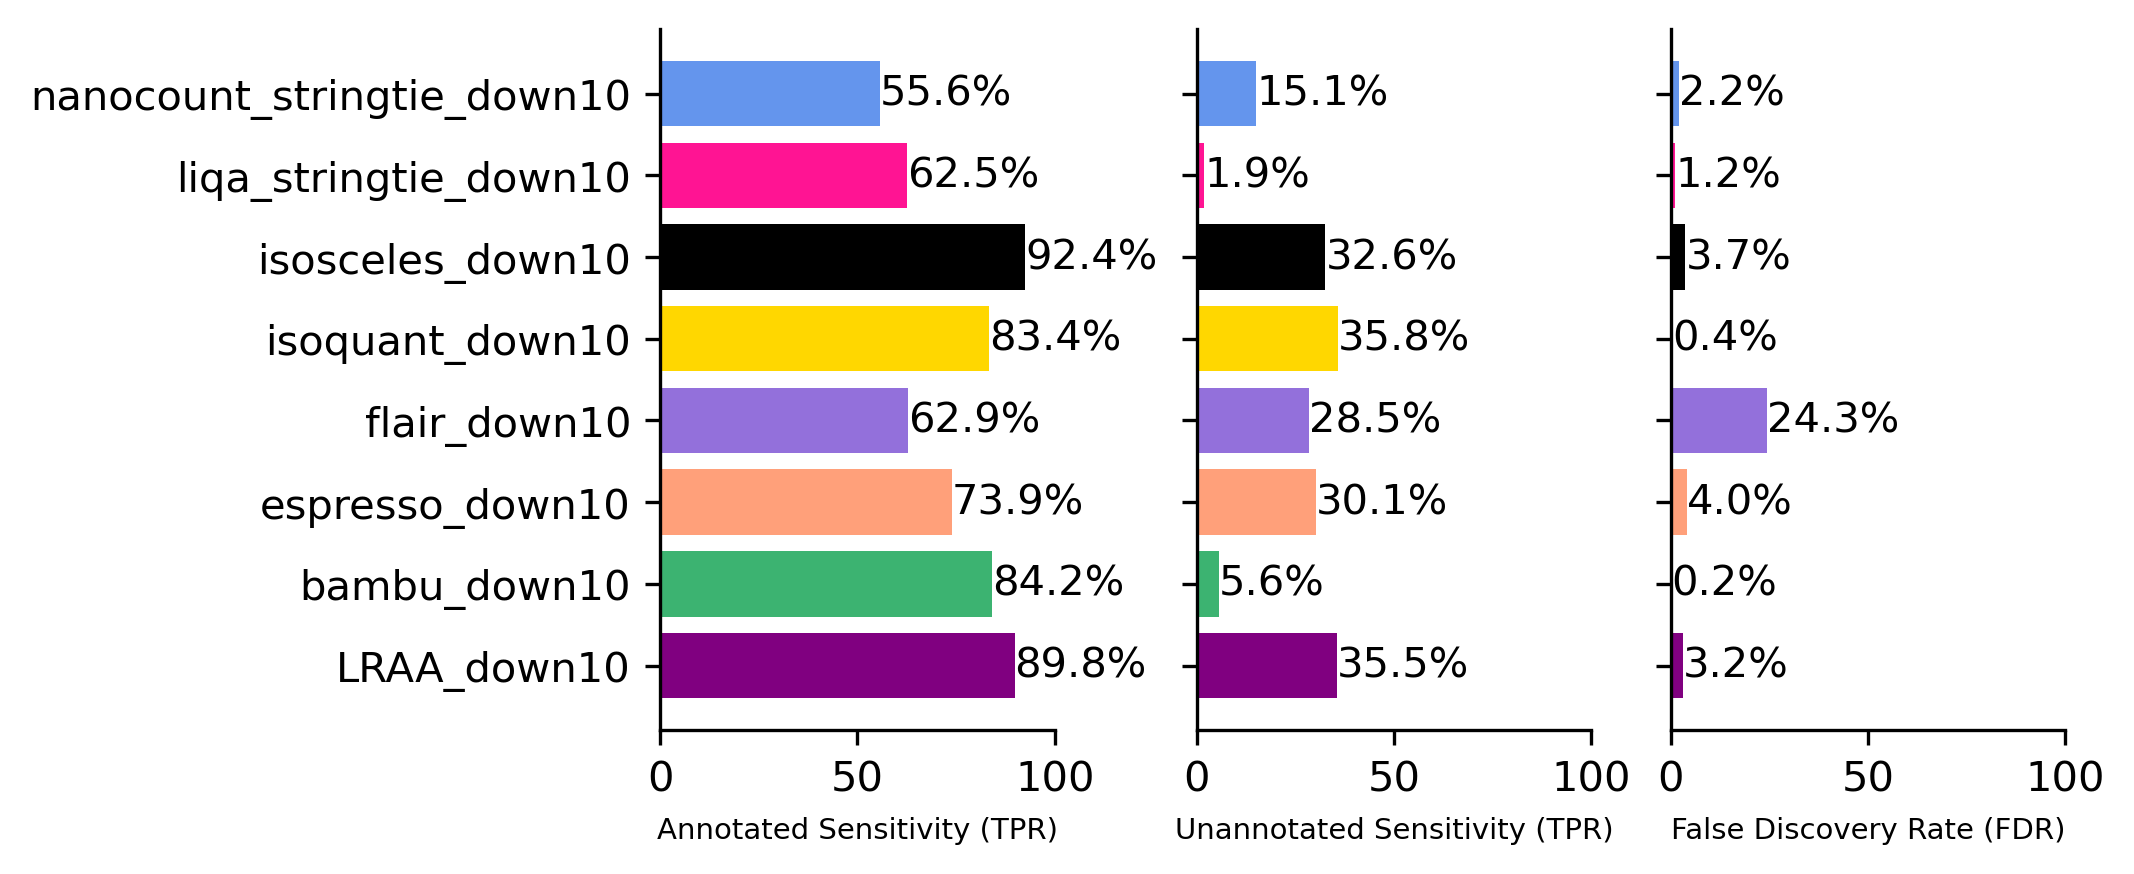

In [33]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, down_10_dict, down_10_kept_intron_ids)

# down_20

In [34]:
down_20_dict = { sample_name : prog_to_downsampled_df_dict[sample_name] 
                for sample_name in prog_to_downsampled_df_dict 
                if "down20" in sample_name}

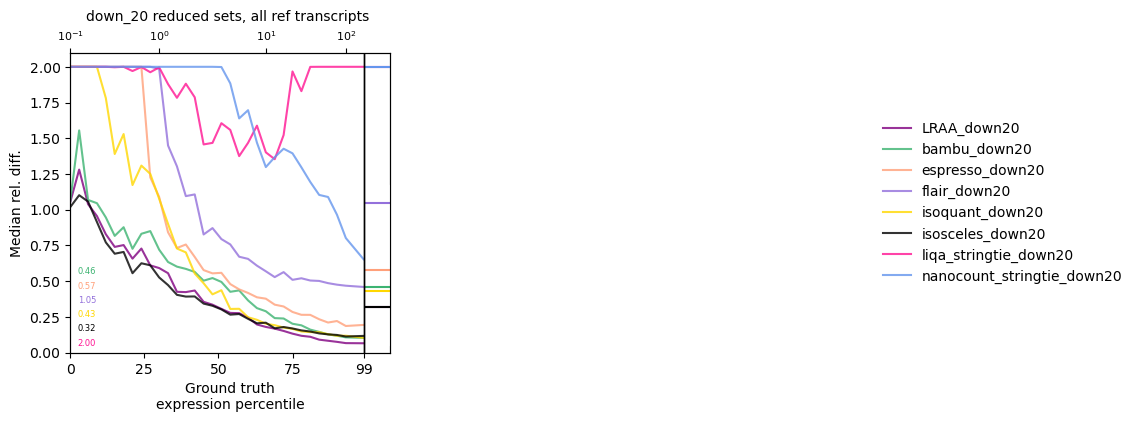

In [35]:
rel_diff_vs_expr_percentile_plot(i_ref_df, down_20_dict, 33, 'median', 'down_20 reduced sets, all ref transcripts ')

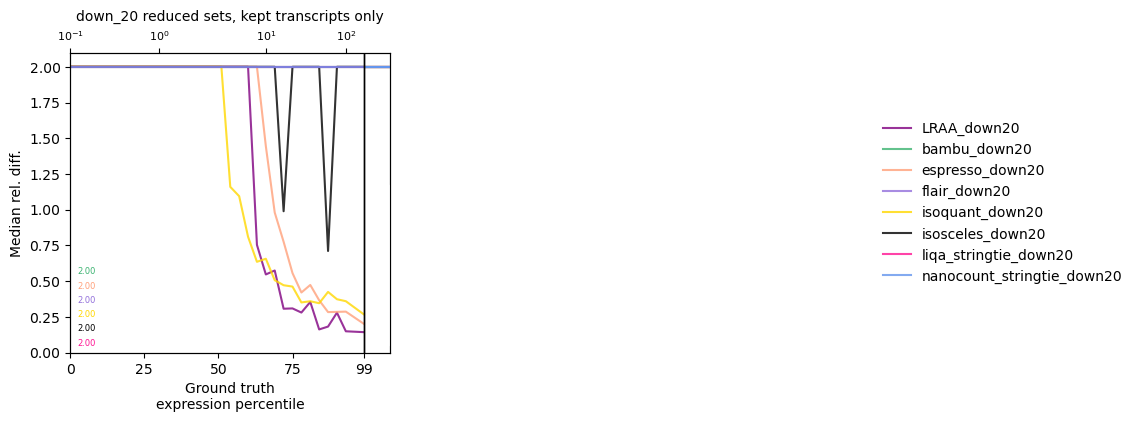

In [36]:
down_20_kept_intron_ids = i_ref_df[i_ref_df['down_20'] == False].index

rel_diff_vs_expr_percentile_plot(i_ref_df, down_20_dict, 33, 'median', 'down_20 reduced sets, kept transcripts only', 
                                intron_ids_use = down_20_kept_intron_ids)

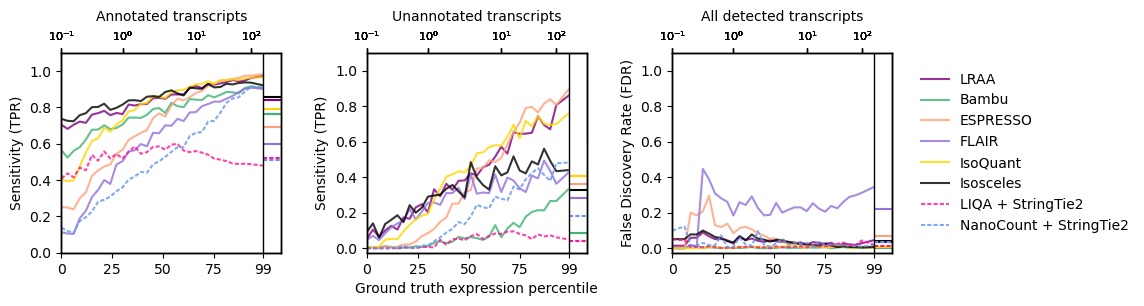

In [37]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_20_dict, 33, 'median', 'down-20 set', down_20_kept_intron_ids)

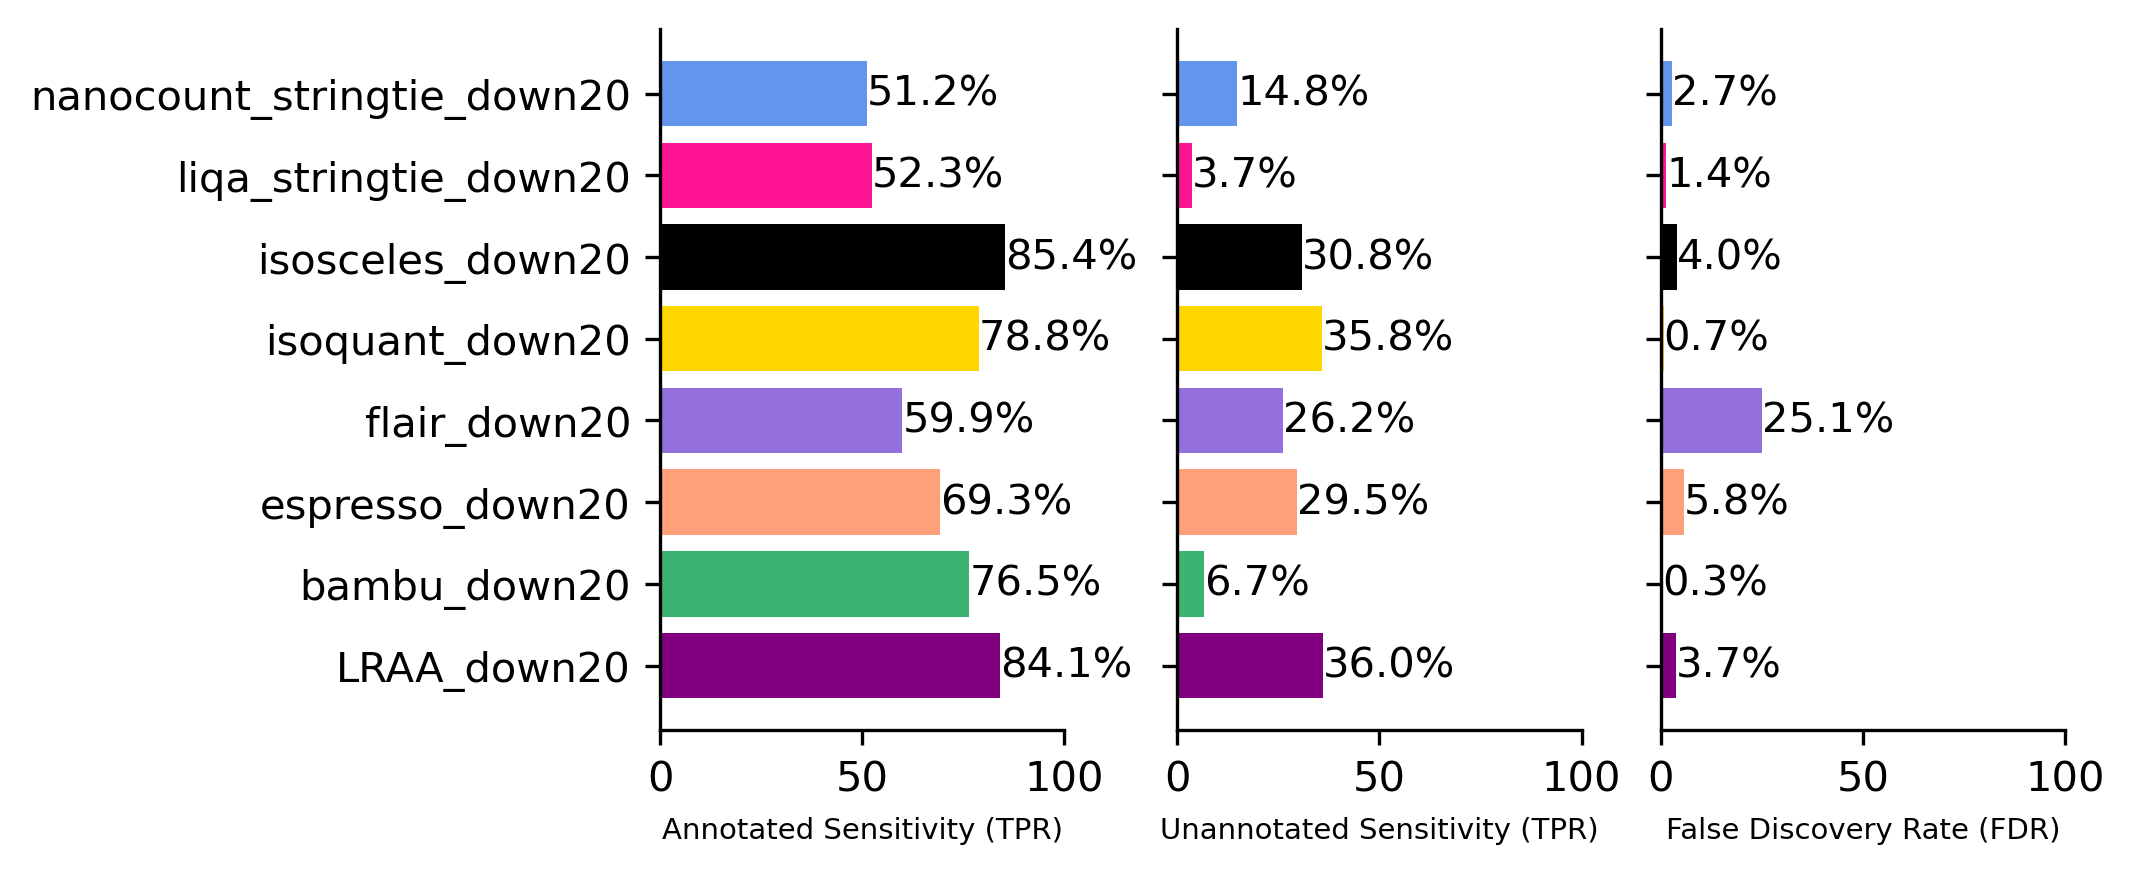

In [38]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, down_20_dict, down_20_kept_intron_ids)

# down_30 

In [39]:
down_30_dict = { sample_name : prog_to_downsampled_df_dict[sample_name] 
                for sample_name in prog_to_downsampled_df_dict 
                if "down30" in sample_name}

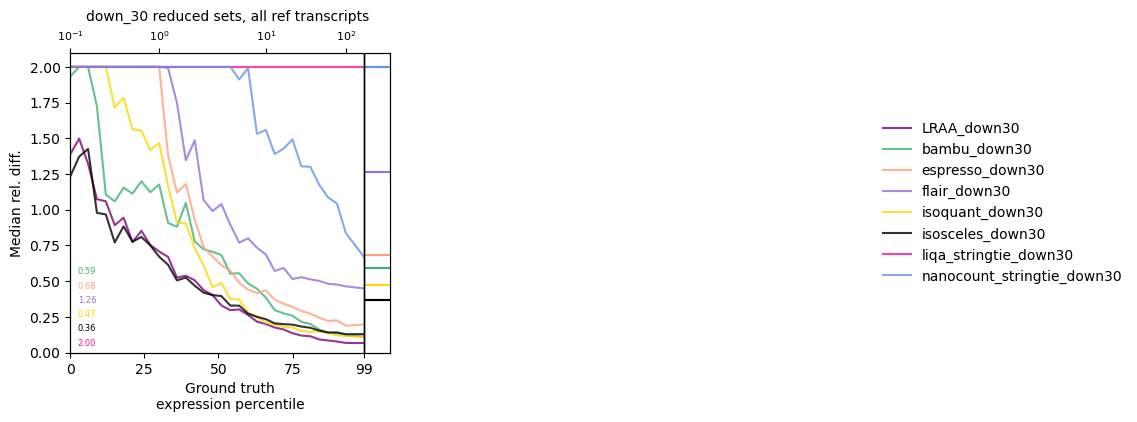

In [40]:
rel_diff_vs_expr_percentile_plot(i_ref_df, down_30_dict, 33, 'median', 'down_30 reduced sets, all ref transcripts ')

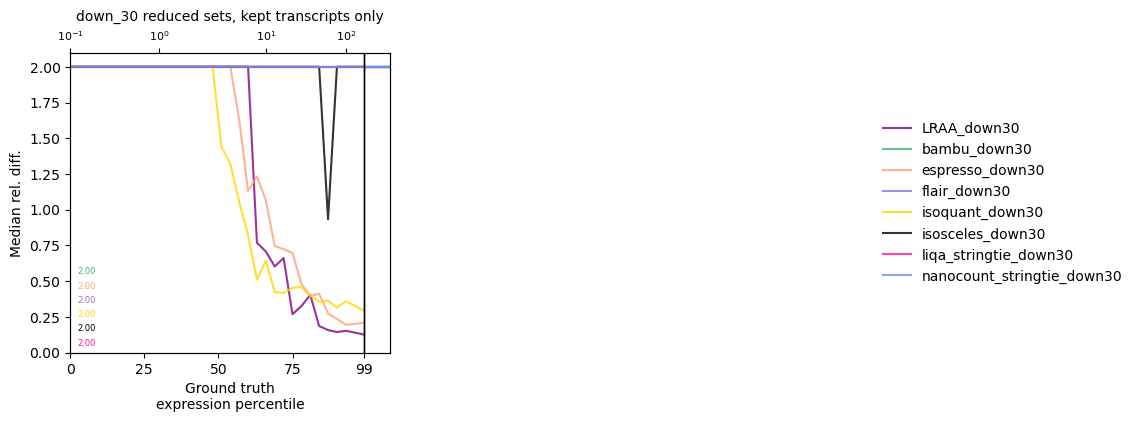

In [41]:
down_30_kept_intron_ids = i_ref_df[i_ref_df['down_30'] == False].index

rel_diff_vs_expr_percentile_plot(i_ref_df, down_30_dict, 33, 'median', 'down_30 reduced sets, kept transcripts only', 
                                intron_ids_use = down_30_kept_intron_ids)

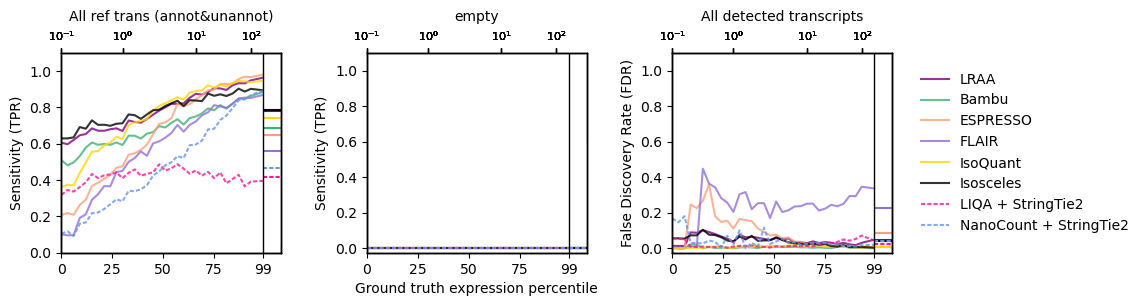

In [51]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_30_dict, 33, 'median', 'down-30 set')

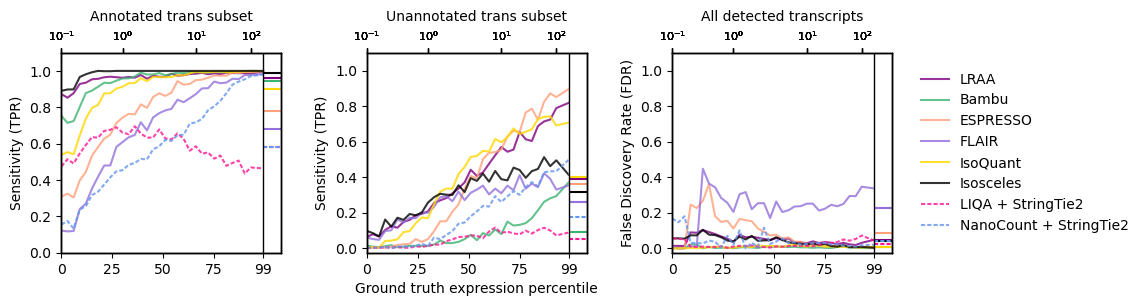

In [52]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_30_dict, 33, 'median', 'down-30 set', down_30_kept_intron_ids)

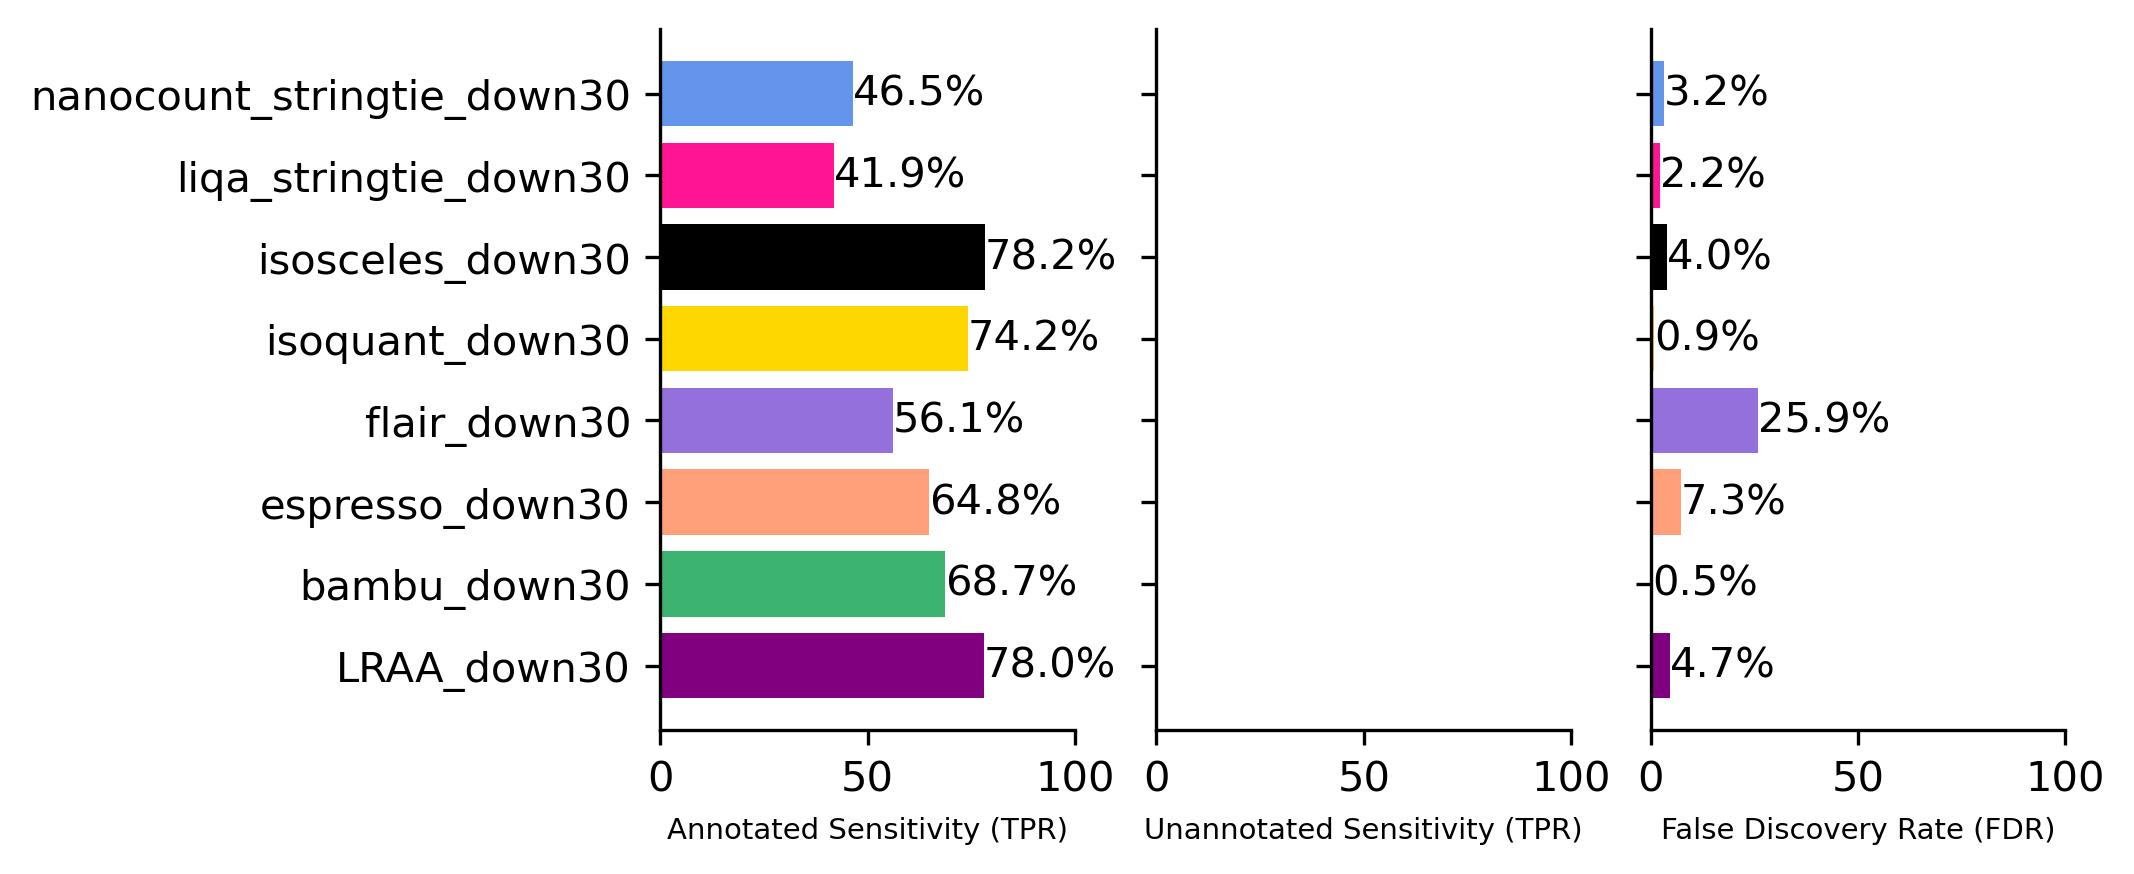

In [74]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, down_30_dict)

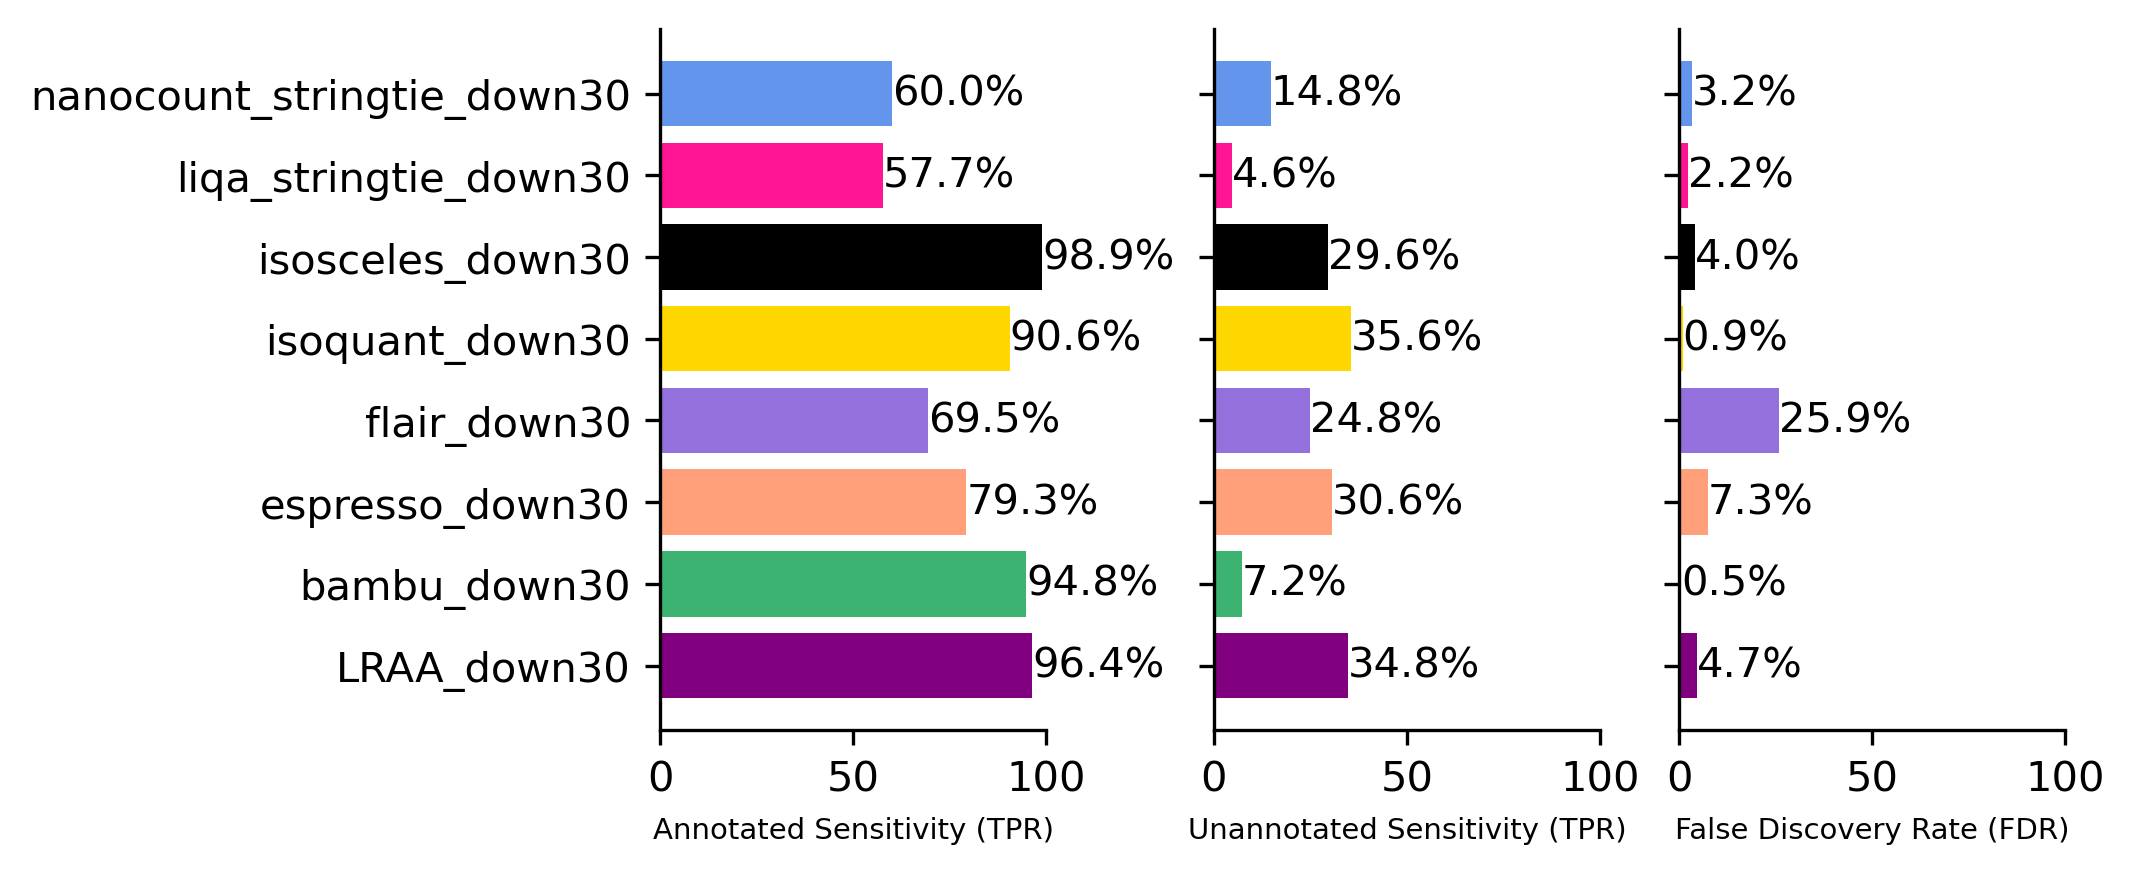

In [73]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, down_30_dict, down_30_kept_intron_ids.values)